                                                         
                                                        Data Preprocessing and Exploration

Introduction to data preprocessing 

Data preprocessing is critical step in data analysis pipeline

Common data preprocessing steps:
 - handling missing values
 - dealing with outliers
 - Data transformations
 - feature engineering

we dont need all the features, we are eliminating irrelvant data, reducing computation time

In [2]:
#customerData.csv

import pandas as pd

cust_data = pd.read_csv('Customer_Data.csv')
cust_data

,Name,Age,Gender,Salary,Purchased
0,John,25.0,Male,50000,Yes
1,Sarah,28.0,Female,400000,Yes
2,Mike,NaN,Male,60000,Yes
3,Anna,22.0,Female,58000,No
4,Tom,30.0,Male,54000,NaN


In [3]:
#checking missing data
cust_data.isnull().sum()

Name         0
Age          1
Gender       0
Salary       0
Purchased    1
dtype: int64

In [ ]:
cust_data.info() #exploring the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       5 non-null      object 
 1   Age        4 non-null      float64
 2   Gender     5 non-null      object 
 3   Salary     5 non-null      int64  
 4   Purchased  4 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 332.0+ bytes


Techniques to Handle missing data
- dropping missing values - dropna()   - if data set is large and removing a few rows wont affect much or missing values are not critical for analysis

- filling missing values - fillna()    - it preserves the relationship between features, imagine we need to find purchase and aage missing we are going to predict age using regression techniques so i have info for gender and purchase so we train a model we are finding age for those missing values

               - mean/median - numeric data  - if data is skewed go for median else go for mean 
               - mode - categorical data

- Advance Imputation

               -KNN imputation  - depending upon NN missing values will be allocated and can be used for categorical data
               -Regression Imputation

- we also fill the missing values using domain knowledge and can be completely inaccurate and mostly guessing work

                                                            Handling Missing Data                                                                           .

In [ ]:
#dropna
cust_data_dropped = cust_data.dropna()
cust_data_dropped

# we only use this when missing values are not core part of data and will not affect the data much for analysis

,Name,Age,Gender,Salary,Purchased
0,John,25.0,Male,50000,Yes
1,Sarah,28.0,Female,400000,Yes
3,Anna,22.0,Female,58000,No


In [9]:
cust_data.describe()


,Age,Salary
count,4.00,5.000000
mean,26.25,124400.000000
std,3.50,154112.945595
min,22.00,50000.000000
25%,24.25,54000.000000
50%,26.50,58000.000000
75%,28.50,60000.000000
max,30.00,400000.000000


In [ ]:
skew_age = cust_data['Age'].skew(skipna=True)
print(f'Skewness of Age column: {skew_age}')

# age is approximately symmetrical as skewness is less than 0.5


Skewness of Age column: -0.3206997084548105


| skewness | < 0.5 --- appriximate symmtery (no significant skewness)

0.5 <= | skewness | < 1 : moderate skewness

| skewness | >= 1 -- data heavily skewed


mean < median -- left skewed  (-ve skew)

mean > median -- right skewed (+ve skew)

if there is skewness replace the missing values with median else replace it with mean

In [16]:
cust_data['Age'].median()

np.float64(26.5)

In [17]:
cust_data['Age'].fillna(cust_data['Age'].mean(), inplace=True)

In [ ]:
skew_age = cust_data['Salary'].skew(skipna=True)
print(f'Skewness of Salary column: {skew_age}')

#data is heavily skewed and right skewed

Skewness of Salary column: 2.232589887860825


In [18]:
cust_data['Salary'].median()

np.float64(58000.0)

In [ ]:
mode_value = cust_data['Purchased'].mode()[0] # we used indexing [0] to get the actual mode value as mode() returns a series

# replace nan values using mode value as the data is categorical and mode is frequently occurring thing in the data

cust_data['Purchased'].fillna(mode_value, inplace=True)

In [22]:
cust_data

,Name,Age,Gender,Salary,Purchased
0,John,25.00,Male,50000,Yes
1,Sarah,28.00,Female,400000,Yes
2,Mike,26.25,Male,60000,Yes
3,Anna,22.00,Female,58000,No
4,Tom,30.00,Male,54000,Yes


                                                                    Handling Outliers                                                                      .

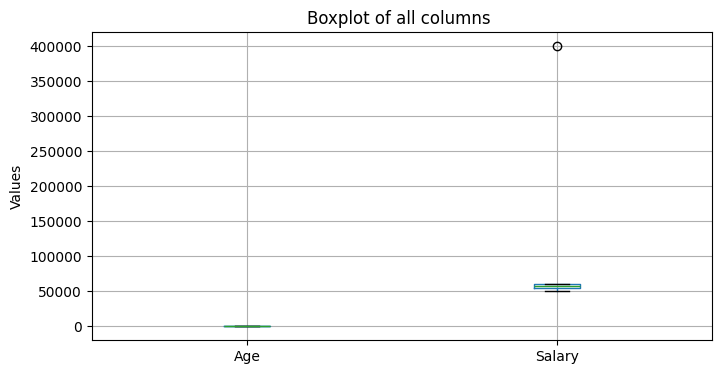

In [25]:
import matplotlib.pyplot as plt

#creating boxplots
cust_data.boxplot(figsize=(8,4))  # pandas method automatically creates boxplot for numerical columns
plt.title('Boxplot of all columns ')
plt.ylabel('Values')
plt.show()

In [28]:
# we can see that there is an outlier in Salary column 

#removing outliers
# calculating Q1 and Q3

Q1 = cust_data['Salary'].quantile(0.25) # 25th percentile
Q3 = cust_data['Salary'].quantile(0.75) # 75th percentile

#calculating IQR - Interquartile Range
IQR = Q3 - Q1

# Calculating Lower and Upper Bound - any value outside these bounds is considered an outlier
lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)

#identifying outliers
outliers = cust_data[(cust_data['Salary'] < lower_bound) | (cust_data['Salary'] > upper_bound)]
outliers


,Name,Age,Gender,Salary,Purchased
1,Sarah,28.0,Female,400000,Yes


In [31]:
cust_data_cleaned = cust_data[(cust_data['Salary'] >= lower_bound) & (cust_data['Salary'] <= upper_bound)] # keeping only non-outlier data
cust_data_cleaned

# since this is small data set we have to use diff tecnhique to handle outliers

,Name,Age,Gender,Salary,Purchased
0,John,25.00,Male,50000,Yes
2,Mike,26.25,Male,60000,Yes
3,Anna,22.00,Female,58000,No
4,Tom,30.00,Male,54000,Yes


In [32]:
lower_bound

np.float64(45000.0)

In [33]:
upper_bound

np.float64(69000.0)

In [ ]:
# capping Outliers - Method of limiting outliers in a column by replacing it with a threshold value
cust_data['Salary'] = cust_data['Salary'].apply(lambda x: min(max(x, lower_bound), upper_bound)) # values above upper bound are replaced with upper bound and below lower bound with lower bound 
cust_data

,Name,Age,Gender,Salary,Purchased
0,John,25.00,Male,50000.0,Yes
1,Sarah,28.00,Female,69000.0,Yes
2,Mike,26.25,Male,60000.0,Yes
3,Anna,22.00,Female,58000.0,No
4,Tom,30.00,Male,54000.0,Yes


                                                             Data Transformation                                                                        .

for diff column data will be in diff range so to bring everything in single format we use data transformation

1. Normalization    - also known as minmax scaling - purpose - we normalize the data between 0 & 1  -> (x- Xmin)/(Xmax - Xmin) - it will also affect the shape of distribution and also sensitive to outliers

2. standardization  - we also have  -ve values here   -  mean will be zero and sd will be 1 - also known as z score scaling - once we transform the data we get a range of values that if we take mean it will be zero and  sd will be equal to 1  - this is useful when data distribution is in bell shape curve - less sensitive to outliers 

3. Log transformation - only used when data is highly skewed when there are more extreme values - it compress the range

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#apply normalization on Salary column
cust_data['Salary_norm'] = scaler.fit_transform(cust_data[['Salary']])
cust_data 

,Name,Age,Gender,Salary,Purchased,Salary_norm
0,John,25.00,Male,50000.0,Yes,0.000000
1,Sarah,28.00,Female,69000.0,Yes,1.000000
2,Mike,26.25,Male,60000.0,Yes,0.526316
3,Anna,22.00,Female,58000.0,No,0.421053
4,Tom,30.00,Male,54000.0,Yes,0.210526


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#apply Standardization on Salary column
cust_data['Salary_std'] = scaler.fit_transform(cust_data[['Salary']])
cust_data 

,Name,Age,Gender,Salary,Purchased,Salary_norm,Salary_std
0,John,25.00,Male,50000.0,Yes,0.000000,-1.28125
1,Sarah,28.00,Female,69000.0,Yes,1.000000,1.68750
2,Mike,26.25,Male,60000.0,Yes,0.526316,0.28125
3,Anna,22.00,Female,58000.0,No,0.421053,-0.03125
4,Tom,30.00,Male,54000.0,Yes,0.210526,-0.65625


In [43]:
import numpy as np

# apply log transformation on Salary column to reduce skewness
cust_data['Salary_log'] = np.log1p(cust_data['Salary']) # extreme  outliers  or skewed data
cust_data

,Name,Age,Gender,Salary,Purchased,Salary_norm,Salary_std,Salary_log
0,John,25.00,Male,50000.0,Yes,0.000000,-1.28125,10.819798
1,Sarah,28.00,Female,69000.0,Yes,1.000000,1.68750,11.141876
2,Mike,26.25,Male,60000.0,Yes,0.526316,0.28125,11.002117
3,Anna,22.00,Female,58000.0,No,0.421053,-0.03125,10.968216
4,Tom,30.00,Male,54000.0,Yes,0.210526,-0.65625,10.896758


                                                Handling Categorical Data                                                                                  .

 - One Hot Encoding (nominal data)



  1   2   3
  0   0   1  -> 3rd category
  0   1   0  -> 2nd category
  1   0   0  -> 1st category
 
 - Label Encoding ( ordinal Data)

0
1
2
3
4



 we do encoding becz ML models often requires numbers thats the reason we have to convert categorical data into numbers

In [44]:
# get_dummies to perform on hot encoding - simple and smaller datasets

df = pd.get_dummies(cust_data, columns=['Gender', 'Purchased' ])
df.info()

# dont use this for large datasets becz it doesnt give much control 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           5 non-null      object 
 1   Age            5 non-null      float64
 2   Salary         5 non-null      float64
 3   Salary_norm    5 non-null      float64
 4   Salary_std     5 non-null      float64
 5   Salary_log     5 non-null      float64
 6   Gender_Female  5 non-null      bool   
 7   Gender_Male    5 non-null      bool   
 8   Purchased_No   5 non-null      bool   
 9   Purchased_Yes  5 non-null      bool   
dtypes: bool(4), float64(5), object(1)
memory usage: 392.0+ bytes


In [ ]:
# main process for One hot encoding

from sklearn.preprocessing import OneHotEncoder

#initialize object
encoder = OneHotEncoder(sparse_output=False) # can add drop='first' to avoid dummy variable trap - if we didnt made sparse_output=False, it would return a sparse matrix or dense array

# transform the data
encoded_data = encoder.fit_transform(cust_data[['Gender', 'Purchased']]) 
encoded_data

array([[0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.]])

In [52]:
# convert to DF
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender', 'Purchased'])) # to concatenate with original df we need to convert it to DF
encoded_df

,Gender_Female,Gender_Male,Purchased_No,Purchased_Yes
0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0


In [53]:
# concatenate encoded df with original df
df_encoded = pd.concat([cust_data, encoded_df], axis=1)
df_encoded

,Name,Age,Gender,Salary,Purchased,Salary_norm,Salary_std,Salary_log,Gender_Female,Gender_Male,Purchased_No,Purchased_Yes
0,John,25.00,Male,50000.0,Yes,0.000000,-1.28125,10.819798,0.0,1.0,0.0,1.0
1,Sarah,28.00,Female,69000.0,Yes,1.000000,1.68750,11.141876,1.0,0.0,0.0,1.0
2,Mike,26.25,Male,60000.0,Yes,0.526316,0.28125,11.002117,0.0,1.0,0.0,1.0
3,Anna,22.00,Female,58000.0,No,0.421053,-0.03125,10.968216,1.0,0.0,1.0,0.0
4,Tom,30.00,Male,54000.0,Yes,0.210526,-0.65625,10.896758,0.0,1.0,0.0,1.0


                                                               Feature Engineering                                                                        .


- generating new features

- feature transformation

- feature selection          - selecting only the features useful for our model - we can use corelation coefficient (only 1 techniquic) \ more covered later

- dimensionality reduction   - we have 10 features when i say we are reducing it to 2, it doesnt mean we are removing other features it means the 2 features have all the info which was included in other features , it will be completely 2 new columns or components 



we can also generate new features using existing features or incorporating domain specific features

In [54]:
# create new feature age group based on age 

def age_group(age):
    if age < 25:
        return 'Young'
    elif age < 30:
        return 'Adult'
    else:
        return 'Senior'
    

cust_data['Age_Group'] = cust_data['Age'].apply(age_group)
cust_data

,Name,Age,Gender,Salary,Purchased,Salary_norm,Salary_std,Salary_log,Age_Group
0,John,25.00,Male,50000.0,Yes,0.000000,-1.28125,10.819798,Adult
1,Sarah,28.00,Female,69000.0,Yes,1.000000,1.68750,11.141876,Adult
2,Mike,26.25,Male,60000.0,Yes,0.526316,0.28125,11.002117,Adult
3,Anna,22.00,Female,58000.0,No,0.421053,-0.03125,10.968216,Young
4,Tom,30.00,Male,54000.0,Yes,0.210526,-0.65625,10.896758,Senior


In [56]:
# feature selection using corr
cust_data.corr(numeric_only=True)

,Age,Salary,Salary_norm,Salary_std,Salary_log
Age,1.000000,0.164256,0.164256,0.164256,0.151155
Salary,0.164256,1.000000,1.000000,1.000000,0.998557
Salary_norm,0.164256,1.000000,1.000000,1.000000,0.998557
Salary_std,0.164256,1.000000,1.000000,1.000000,0.998557
Salary_log,0.151155,0.998557,0.998557,0.998557,1.000000


                                                        Data Visualization                                                                              .
                                                        

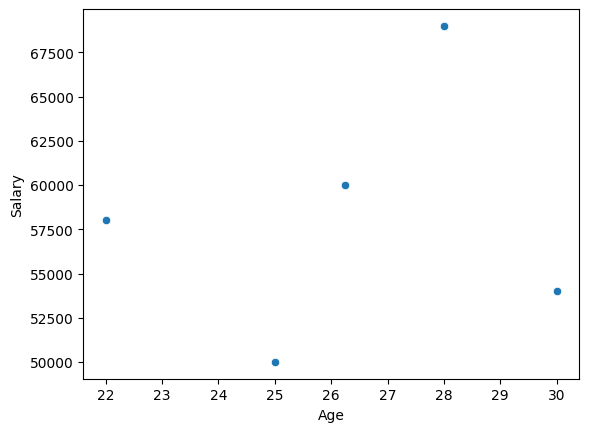

In [57]:
import seaborn as sns

sns.scatterplot(data=cust_data, x='Age', y='Salary')
plt.show()

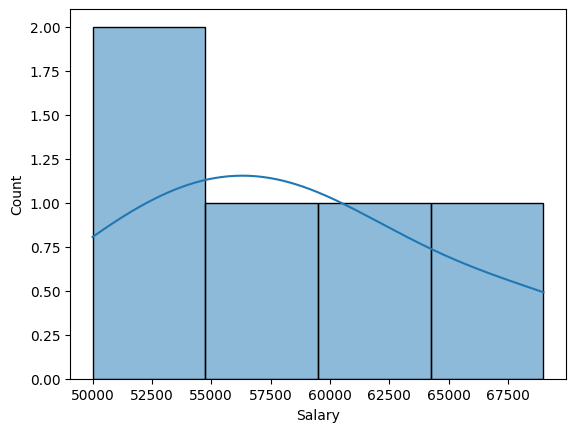

In [ ]:
sns.histplot(cust_data['Salary'], kde=True)
plt.show()

# data is right skewed